# Get the Raw data frame


In [1]:
import pandas as pd

In [2]:
#Importing the data into the workspace
Rawdf = pd.read_csv('AnomalyRawData.csv')

# Visualize raw data

In [3]:
#Visualizing the data
Rawdf

,Interval,Interval (UTC),C8VP902/DielectricConst.value (raw data),C8VP902/DynamicViscosity.value (raw data),C8VP902/Density.value (raw data),C8VP902/Temperature.value (raw data),1JVP902/DynamicViscosity.avg,1JVP902/DynamicViscosity.min,1JVP902/DynamicViscosity.max,1JVP902/DielectricConst.avg,1JVP902/DielectricConst.min,1JVP902/DielectricConst.max,1JVP902/Density.avg,1JVP902/Density.min,1JVP902/Density.max,1JVP902/Temperature.avg,1JVP902/Temperature.min,1JVP902/Temperature.max
0,11/01/2021 06:00 AM,11/01/2021 04:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/01/2021 10:00 AM,11/01/2021 08:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/01/2021 02:00 PM,11/01/2021 12:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/01/2021 06:00 PM,11/01/2021 04:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021 10:00 PM,11/01/2021 08:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,01/14/2022 02:00 AM,01/14/2022 12:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,01/14/2022 06:00 AM,01/14/2022 04:00 AM,NaN,NaN,NaN,NaN,126.423077,0.0,254.0,79.961538,1.0,175.0,128.961538,14.0,253.0,42.346154,38.0,45.0
768,01/14/2022 10:00 AM,01/14/2022 08:00 AM,NaN,NaN,NaN,NaN,109.093750,0.0,254.0,62.468750,0.0,254.0,131.156250,12.0,243.0,44.437500,44.0,45.0
769,01/14/2022 02:00 PM,01/14/2022 12:00 PM,NaN,NaN,NaN,NaN,123.923077,9.0,253.0,96.179487,42.0,169.0,125.230769,12.0,255.0,44.333333,43.0,45.0


Checking the column entries

In [4]:
Rawdf.dtypes

Interval                                      object
 Interval (UTC)                               object
C8VP902/DielectricConst.value (raw data)     float64
C8VP902/DynamicViscosity.value (raw data)    float64
C8VP902/Density.value (raw data)             float64
C8VP902/Temperature.value (raw data)         float64
1JVP902/DynamicViscosity.avg                 float64
1JVP902/DynamicViscosity.min                 float64
1JVP902/DynamicViscosity.max                 float64
1JVP902/DielectricConst.avg                  float64
1JVP902/DielectricConst.min                  float64
1JVP902/DielectricConst.max                  float64
1JVP902/Density.avg                          float64
1JVP902/Density.min                          float64
1JVP902/Density.max                          float64
1JVP902/Temperature.avg                      float64
1JVP902/Temperature.min                      float64
1JVP902/Temperature.max                      float64
dtype: object

Dropping columns we dont need

In [5]:
#Drop the "UTC" column
df = Rawdf.drop([' Interval (UTC)', Rawdf.columns[2],Rawdf.columns[3], Rawdf.columns[4], Rawdf.columns[5] ], axis = 1)

In [6]:
df

,Interval,1JVP902/DynamicViscosity.avg,1JVP902/DynamicViscosity.min,1JVP902/DynamicViscosity.max,1JVP902/DielectricConst.avg,1JVP902/DielectricConst.min,1JVP902/DielectricConst.max,1JVP902/Density.avg,1JVP902/Density.min,1JVP902/Density.max,1JVP902/Temperature.avg,1JVP902/Temperature.min,1JVP902/Temperature.max
0,11/01/2021 06:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/01/2021 10:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/01/2021 02:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/01/2021 06:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021 10:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,01/14/2022 02:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,01/14/2022 06:00 AM,126.423077,0.0,254.0,79.961538,1.0,175.0,128.961538,14.0,253.0,42.346154,38.0,45.0
768,01/14/2022 10:00 AM,109.093750,0.0,254.0,62.468750,0.0,254.0,131.156250,12.0,243.0,44.437500,44.0,45.0
769,01/14/2022 02:00 PM,123.923077,9.0,253.0,96.179487,42.0,169.0,125.230769,12.0,255.0,44.333333,43.0,45.0


Convert the Interval to datetime stamp

In [7]:
df['Interval'] = pd.to_datetime(df['Interval'])

In [8]:
df.dtypes

Interval                        datetime64[ns]
1JVP902/DynamicViscosity.avg           float64
1JVP902/DynamicViscosity.min           float64
1JVP902/DynamicViscosity.max           float64
1JVP902/DielectricConst.avg            float64
1JVP902/DielectricConst.min            float64
1JVP902/DielectricConst.max            float64
1JVP902/Density.avg                    float64
1JVP902/Density.min                    float64
1JVP902/Density.max                    float64
1JVP902/Temperature.avg                float64
1JVP902/Temperature.min                float64
1JVP902/Temperature.max                float64
dtype: object

Rename column names

In [9]:
df.columns = ['Interval', 'DynamicViscosityAvg', 'DynamicViscosityMin', 'DynamicViscosityMax',
           'DielectricConstAvg', 'DielectricConstMin', 'DielectricConstMax', 'DensityAvg', 'DensityMin',
           'DensityMax', 'TemperatureAvg', 'TemperatureMin', 'TemperatureMax']

In [10]:
df.shape

(771, 13)

# Dealing with missing data entries

We need to first get the statistical summary of the raw data. The distribution of the data will guide us on how to deal with missing values in our data.

Of all the properties being evaluated (Temperature, Viscosity, Dielectrc and Density), Temperature is our key independent variable, as it influnces the remaining properties i.e A change in temperature will most likey influnece Viscosity, Density and Dielectric.

For this reaoson we will focus on the distribution of Average temperature data to guide us on how to deal with missing values on the entire data set.

Statistical summary of the Average Temperature

In [11]:
df['TemperatureAvg'].describe()

count    219.000000
mean      44.014125
std        2.896041
min       36.964286
25%       43.307193
50%       43.950000
75%       44.333333
max       60.307692
Name: TemperatureAvg, dtype: float64

*Visualz*

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Average Temperature (°C)')

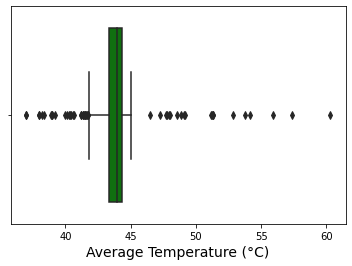

In [34]:
sns.boxplot(df['TemperatureAvg'],  color= 'green')
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)

Text(10.049999999999997, 0.5, 'Count')

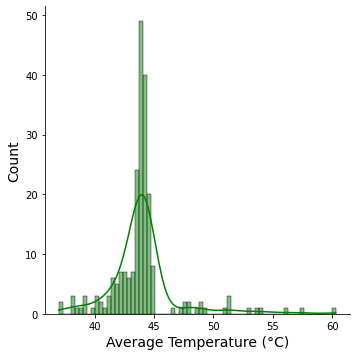

In [35]:

sns.displot(df['TemperatureAvg'], color= 'green', kde = True)
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)
plt.ylabel('Count', fontsize= 14)

The results above depict a positive/right skewed distribution: Meaning, most data falls to the right, or positive side, of the graph's peak

Dealing with Missing Values: 
We have 3 options
1. Replacing missing values with zeros.
2. Replacing missing values with mean values
3. Replacing missing values with the mode
4. Replacing the values with the median
3. Removing entries with missing values

1. Replacing missing values with zeros

In [15]:
dfZero = df.fillna(0)

In [16]:
dfZero

,Interval,DynamicViscosityAvg,DynamicViscosityMin,DynamicViscosityMax,DielectricConstAvg,DielectricConstMin,DielectricConstMax,DensityAvg,DensityMin,DensityMax,TemperatureAvg,TemperatureMin,TemperatureMax
0,2021-11-01 06:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,2021-11-01 10:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,2021-11-01 14:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,2021-11-01 18:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,2021-11-01 22:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-01-14 02:00:00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
767,2022-01-14 06:00:00,126.423077,0.0,254.0,79.961538,1.0,175.0,128.961538,14.0,253.0,42.346154,38.0,45.0
768,2022-01-14 10:00:00,109.093750,0.0,254.0,62.468750,0.0,254.0,131.156250,12.0,243.0,44.437500,44.0,45.0
769,2022-01-14 14:00:00,123.923077,9.0,253.0,96.179487,42.0,169.0,125.230769,12.0,255.0,44.333333,43.0,45.0


In [17]:
#Statistical Summary
dfZero['TemperatureAvg'].describe()

count    771.000000
mean      12.502066
std       19.921145
min        0.000000
25%        0.000000
50%        0.000000
75%       41.664511
max       60.307692
Name: TemperatureAvg, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Average Temperature (°C)')

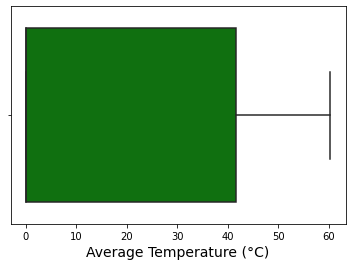

In [32]:
sns.boxplot(dfZero['TemperatureAvg'],  color= 'green')
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)

Text(3.799999999999997, 0.5, 'Count')

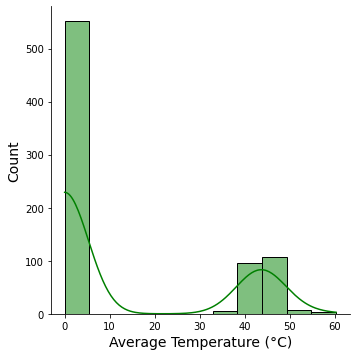

In [36]:
sns.displot(dfZero['TemperatureAvg'], color= 'green', kde = True)
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)
plt.ylabel('Count', fontsize= 14)

2. Replacing missing values with mean values

In [20]:
dfMean = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [21]:
dfMean 

,Interval,DynamicViscosityAvg,DynamicViscosityMin,DynamicViscosityMax,DielectricConstAvg,DielectricConstMin,DielectricConstMax,DensityAvg,DensityMin,DensityMax,TemperatureAvg,TemperatureMin,TemperatureMax
0,2021-11-01 06:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
1,2021-11-01 10:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
2,2021-11-01 14:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
3,2021-11-01 18:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
4,2021-11-01 22:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-01-14 02:00:00,128.416650,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
767,2022-01-14 06:00:00,126.423077,0.000000,254.000000,79.961538,1.000000,175.000000,128.961538,14.000000,253.000000,42.346154,38.000000,45.000000
768,2022-01-14 10:00:00,109.093750,0.000000,254.000000,62.468750,0.000000,254.000000,131.156250,12.000000,243.000000,44.437500,44.000000,45.000000
769,2022-01-14 14:00:00,123.923077,9.000000,253.000000,96.179487,42.000000,169.000000,125.230769,12.000000,255.000000,44.333333,43.000000,45.000000


In [22]:
#Statistical Summary
dfMean['TemperatureAvg'].describe()

count    771.000000
mean      44.014125
std        1.540947
min       36.964286
25%       44.014125
50%       44.014125
75%       44.014125
max       60.307692
Name: TemperatureAvg, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Average Temperature (°C)')

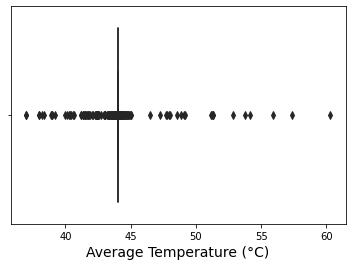

In [30]:
sns.boxplot(dfMean['TemperatureAvg'],  color= 'green')
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)

Text(-2.575000000000003, 0.5, 'Count')

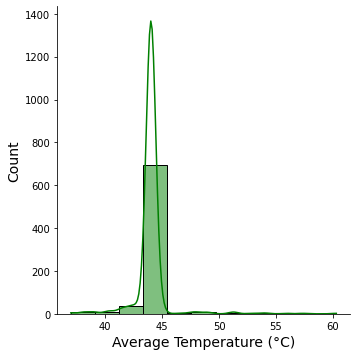

In [37]:
sns.displot(dfMean['TemperatureAvg'], color= 'green', kde = True)
plt.xlabel("Average Temperature (\xb0C)", fontsize= 14)
plt.ylabel('Count', fontsize= 14)

In [25]:
dfMean.to_csv('AnomalyClean.csv')

# Building The Anomaly Detector

In [26]:
#!pip install pycaret

In [27]:
from pycaret.utils import enable_colab
enable_colab()

ModuleNotFoundError: ignored

In [ ]:
#check the shape of data
dfMean.shape

In order to demonstrate the predict_model() function on unseen data, a sample of 7%  are taken out from original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split. This particular split is performed to simulate real life scenario. Another way to think about this is that these 54 samples are not available at the time when this experiment was performed.

In [ ]:
data = dfMean.sample(frac=0.93, random_state=786)
data_unseen = dfMean.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

# Setting up Environment in PyCaret

In [ ]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   ignore_features = ['Interval'],
                   session_id = 123)

# Create a Model

In [ ]:
models()

In [ ]:
iforest = create_model('iforest')

In [ ]:
print(iforest)

In [ ]:
svm = create_model('svm', fraction = 0.025)

In [ ]:
print(svm)

# Assign a Model

In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

# Plot a Model

T-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (10, 6))
plot_model(iforest)

Uniform Manifold Approximation and Projection

In [ ]:
plot_model(iforest, plot = 'umap')


# Predict on Unseen Data

In [ ]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()

Label column indicates the outlier (1 = outlier, 0 = inlier). Score is the values computed by the algorithm. Outliers are assigned with larger anomaly scores. You can also use predict_model() function to label the training data.

In [ ]:
data_predictions = predict_model(iforest, data = data)
data_predictions.head()

# Saving the Model

In [ ]:
save_model(iforest,'Entire dataset anomalies')

In [ ]:
results = assign_model(svm)
results.head()

In [ ]:
Eliptic = create_model(Eliptic)

In [ ]:
plot_model(svm)